<div style="display: flex;">
    <h1>Machine Learning on Covid dataset</h1>
    <img src="covid.jpeg" heigh="100px" width="250px"/>
</div>

<div style="border: 1px dashed black;
            padding: 10px 10px 10px 10px;">
    <h4>Machine Learning general workflow :</h4>
    <ol>
        <li><strong>Defining a quantitative objective</strong></li>
        <li><strong>EDA (Exploratory Data Analysis):</strong> Understanding as much as possible the data in order to define modelling startegy.
        <ul>
            <li><span style="color: blue;">Identifying the target</span></li>
            <li><span style="color: blue;">Number of rows and columns</span></li>
            <li><span style="color: blue;">Variables types</span></li>
            <li><span style="color: blue;">Identification of missing values</span></li>
            <li><span style="color: red;">Visualizing the target</span></li>
            <li><span style="color: red;">Understanding all the variables</span></li>
            <li><span style="color: red;">Visualizing relationships between the target and the features</span></li>
            <li><span style="color: red;">Identifying outliers</span></li>
        </ul></li>
        <li><strong>Pre-Processing: </strong>Transforming the data in order to have a proper input for modelling.
        <ul>
            <li>Splitting data into Train set and Test set</li>
            <li>Removing/Replacing NA</li>
            <li>Encoding variables</li>
            <li>Removing outliers which drop down model performances</li>
            <li>Feature selection</li>
            <li>Feature engineering</li>
            <li>Feature scaling</li>
        </ul></li>
        <li><strong>Modelling: </strong> Giving answer to the former objective.
        <ul>
            <li>Defining a scoring function</li>
            <li>Training of the differents models</li>
            <li>Optimization with GridSearchCV</li>
            <li>(Optional) Analysis of errors and go back to EDA/Pre processing</li>
            <li>Learning curve and decision</li>
        </ul></li>
    </ol>
    <p>(<span style="color: blue;">*="front-end" part</span>, <br/>
        <span style="color: red;">*="back-end" part</span>)</p>
          <a href='https://scikit-learn.org/stable/index.html#' target='_blank'>See Scikit-Learn documentation</a>
        <br/>
        <a href='https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html' target='_blank'>See Scikit-Learn scheme for choosing the right model</a>
        <br/>
        <a href='https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/', target='_blank'>See external ressouces about classification metrics</a>
    </p>
</div>

Data can be found at https://www.kaggle.com/einsteindata4u/covid19.</br>

<h3>0) Preliminary remarks</h3>

<ul>
    <li>Clinical data have been already standardized (mean set to 0 and standard deviation to 1)</li>
</ul>

<h3>1) Objectives</h3>

<strong>Predict confirmed COVID-19 cases among suspected cases with a Sensitivity of 75%.</strong>
</br>Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?
</br>We have chosen the <strong>Sensitivity metric</strong> because of the class disequelibrium and the fact that we want to penalize False Negative more than False Positive.

<h3>2) EDA</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
covid = pd.read_excel('/media/anthony/USOPP/Kaggle/covid_dataset.xlsx')
print('{} rows x {} columns'.format(covid.shape[0], covid.shape[1]))
covid.columns = [i.replace(' (1=yes, 0=no)', '').\
                 replace(' ', '_').\
                 replace('-', '_') for i in covid.columns]
covid.head()

5644 rows x 111 columns


,Patient_ID,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,...,Hb_saturation_(arterial_blood_gases),pCO2_(arterial_blood_gas_analysis),Base_excess_(arterial_blood_gas_analysis),pH_(arterial_blood_gas_analysis),Total_CO2_(arterial_blood_gas_analysis),HCO3_(arterial_blood_gas_analysis),pO2_(arterial_blood_gas_analysis),Arteiral_Fio2,Phosphor,ctO2_(arterial_blood_gas_analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
covid.describe(include=['int64', 'float64'])

,Patient_age_quantile,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,...,Hb_saturation_(arterial_blood_gases),pCO2_(arterial_blood_gas_analysis),Base_excess_(arterial_blood_gas_analysis),pH_(arterial_blood_gas_analysis),Total_CO2_(arterial_blood_gas_analysis),HCO3_(arterial_blood_gas_analysis),pO2_(arterial_blood_gas_analysis),Arteiral_Fio2,Phosphor,ctO2_(arterial_blood_gas_analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


<strong>We have 74 quantitative variables.</strong>

Identifying and visualizing the target :

9.89% positive
90.11% negative


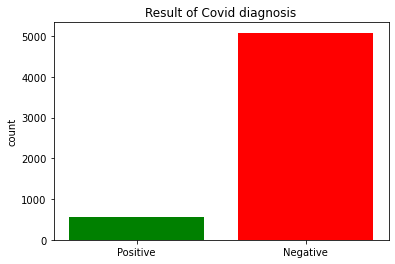

In [69]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.bar(x=['Positive', 'Negative'],
       height=[list(covid.SARS_Cov_2_exam_result).count('positive'),
               list(covid.SARS_Cov_2_exam_result).count('negative')],
       color=['green', 'red'])
ax.set_title('Result of Covid diagnosis')
ax.set_ylabel('count')
print('{:.2f}% positive'.format(list(covid.SARS_Cov_2_exam_result).count('positive')*100/5644))
print('{:.2f}% negative'.format(list(covid.SARS_Cov_2_exam_result).count('negative')*100/5644))

<strong>We see a huge class-disequelibrium, thus we should not use the Accuracy metric for evaluating our model.</strong>

Identification of missing values :

In [107]:
print('{} missing values versus {} total values'.format(np.abs(covid.count()-5644).cumsum().max(),
                                                        covid.shape[0]*covid.shape[1]))

551682 missing values versus 626484 total values


There is a lot of missing data as explained in the dataset description on Kaggle : "Decision making by health care professionals is a complex process, when physicians see a patient for the first time with an acute complaint (e.g., recent onset of fever and respiratory symptoms) they will take a medical history, perform a physical examination, and will base their decisions on this information. To order or not laboratory tests, and which ones to order, is among these decisions, and there is no standard set of tests that are ordered to every individual or to a specific condition."</br>
<strong>Most of the missing data are about laboratory tests.</strong>

<h3>3) Preprocessing</h3>